# Felipe Veloso Desaf3

## Ejercicio 1: Preparar el ambiente de trabajo

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import glob
import os

warnings.simplefilter('ignore')
plt.rcParams['figure.figsize'] = (15,12)
plt.style.use('seaborn')

In [2]:
# !ls dump/
file_list = glob.glob(os.getcwd() + '/dump/*.csv')

In [3]:
append_csv = []
for i in file_list:
    append_csv.append(
        pd.read_csv(i, index_col=None, header=0).drop(columns='Unnamed: 0'))

In [4]:
df_lyrics = pd.concat(append_csv)

In [93]:
#df_lyrics.head()
df_lyrics.columns = ['Artist','Genre','Song','Lyrics']

In [94]:
def bar(df,var,rotation=0 ):
    """
    Definición:
    Presenta gráfico de barra  de una variable de un data frame.
    Elementos:
    df_x: data frame a analizar
    var: variable del data frame a analizar
    Retorno:
    Gráfico de barras que representa los datos insertados.
    """
    tmp = df[var].value_counts().to_frame().reset_index()
    tmp.rename(columns={'index':var,var:'ocurrencias'},inplace=True)
    sns.barplot(x=var,y='ocurrencias',data=tmp)
    plt.xticks(rotation=rotation)
    plt.title(f'Distribución de la variable {var}')
    plt.show()

## Ejercicio 2: Descripción de los datos

bar(df_lyrics,'Artist',90)

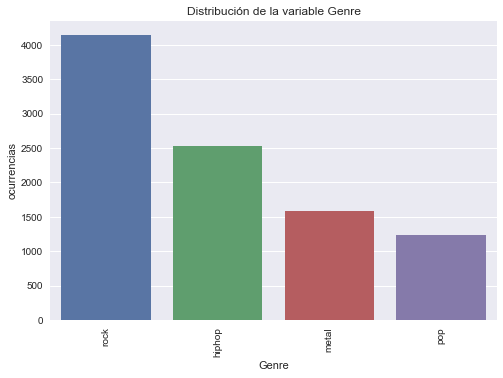

In [95]:
bar(df_lyrics,'Genre',90)

Al analizar artistas verificamos que existen 4 artistas con gran cantidad de ocurrencias //
EL rock `como siempre ha debido ser como ley universal`, muestra ser el genero con mayor influencia en nuestra data

## Ejercicio 3: Matriz de ocurrencias

In [101]:
from sklearn.feature_extraction.text import CountVectorizer
# instanciamos un objeto
count_vectorizer=CountVectorizer(stop_words='english')
# Implementamos los pasos fit y transform
count_vectorizer_fit = count_vectorizer.fit_transform(df_lyrics.Lyrics)
# Extraemos tokens (palabras)
words = count_vectorizer.get_feature_names()
# extraemos frecuencia
words_freq = count_vectorizer_fit.toarray().sum(axis=0)

df_words = pd.DataFrame({'Word':words, 'Frec':words_freq})

top100 = df_words.sort_values(by='Frec', ascending=False).head(100)

In [102]:
top100

,Word,Frec
24950,like,19629
12859,don,17398
23856,know,14962
18439,got,14171
23287,just,13978
25479,love,11268
48591,yeah,11071
25165,ll,10028
29851,oh,9879
7009,cause,8356


In [132]:
df_lyrics.Genre.unique()

array(['hiphop', 'metal', 'pop', 'rock'], dtype=object)

In [141]:
def fromGenre(df):
    from sklearn.feature_extraction.text import CountVectorizer
    # instanciamos un objeto
    count_vectorizer=CountVectorizer(stop_words='english')
    # Implementamos los pasos fit y transform
    for genre in df.Genre.unique():
        count_vectorizer_fit = count_vectorizer.fit_transform(df.Lyrics)
        # Extraemos tokens (palabras)
        words = count_vectorizer.get_feature_names()
        # extraemos frecuencia
        words_freq = count_vectorizer_fit.toarray().sum(axis=0)

        df_words = pd.DataFrame({'Word':words, 'Frec':words_freq})

        return df_words.sort_values(by='Frec', ascending=False).head(25)

In [142]:
fromGenre(df_lyrics[df_lyrics['Genre']=='metal'])

,Word,Frec
7883,life,1233
4088,don,1181
3284,death,1139
13844,time,1096
7977,ll,1069
7622,know,1048
7524,just,993
1458,blood,884
7914,like,869
3766,die,866


In [143]:
fromGenre(df_lyrics[df_lyrics['Genre']=='hiphop'])

,Word,Frec
18361,like,12055
13533,got,7613
9466,don,7604
17532,know,6535
17082,just,6272
28298,shit,5546
909,ain,4782
5237,cause,4737
19198,man,4481
35793,yo,4425


In [144]:
 fromGenre(df_lyrics[df_lyrics['Genre']=='pop'])

,Word,Frec
3135,don,3329
6219,like,2995
6390,love,2914
7455,oh,2737
5918,know,2677
5748,just,2610
12163,yeah,2244
655,baby,2192
4582,got,2156
6290,ll,1743


In [145]:
 fromGenre(df_lyrics[df_lyrics['Genre']=='rock'])

,Word,Frec
5282,don,5284
10362,love,5114
9697,know,4702
12077,oh,4258
20056,yeah,4157
9517,just,4103
7606,got,3872
10220,ll,3825
10113,like,3710
19093,ve,2877


La palabra transversalmente mas usada es `don`, palabras como love es utilizado de manera infima en el metal, pero muy utilizada en otros estilos

## Ejercicio 4: Entrenamiento del Modelo

In [155]:
X_train , X_test, y_train, y_test = train_test_split(df_lyrics, test_size=.30, random_state=3324)

NameError: name 'train_test_split' is not defined

In [153]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import RandomizedPCA

ImportError: cannot import name 'RandomizedPCA' from 'sklearn' (/anaconda3/lib/python3.7/site-packages/sklearn/__init__.py)

In [154]:
pipeline_model.fit(X_train, y_train)
y_hat = pipeline_model.predict(y_test)

NameError: name 'pipeline_model' is not defined